### Plotting Graphs

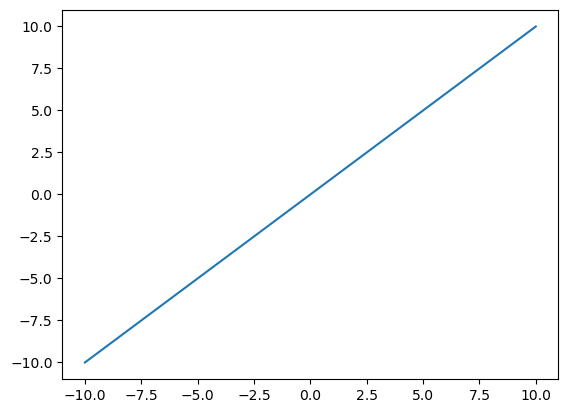

In [3]:
# plotting a 2D plot
# x = y
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10,10,100)
y = x
plt.plot(x,y)

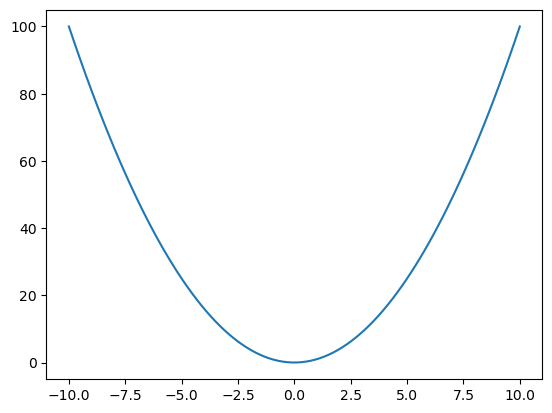

In [4]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y)

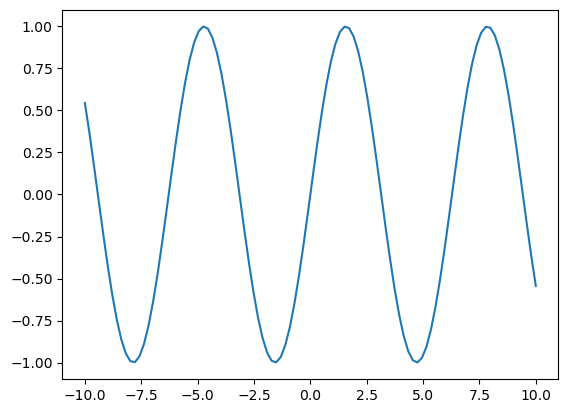

In [6]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y)

/var/folders/d0/zpksyyln31xcrk5dycg4_4n40000gp/T/ipykernel_15047/170440145.py:4: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x)


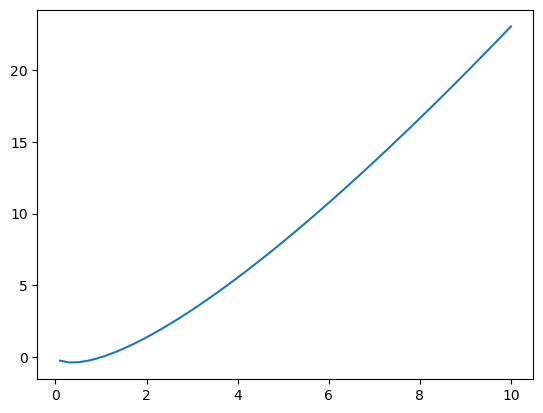

In [7]:
# y = xlog(x)

x = np.linspace(-10,10,100)
y = x*np.log(x)
plt.plot(x,y)

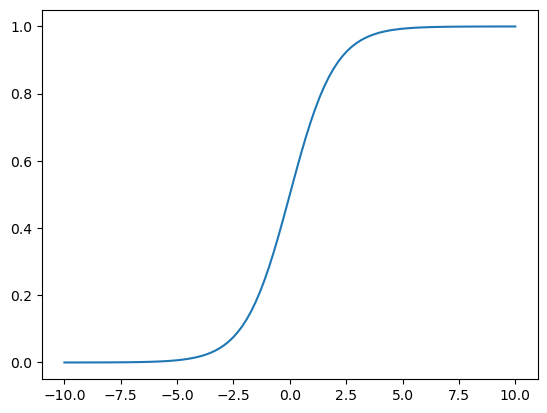

In [9]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plt.plot(x,y)